In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

C:\Users\ricky\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
lccs.shape

(39717, 111)

In [4]:
lccs.isna().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [5]:
##Identify columns with all NA values >= 60%
loan_df = pd.read_csv('loan.csv')
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
loan_df.columns

## writing the file to excel to analyse
#loan_df.to_excel('loan_df.xlsx', index = None)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [6]:
loan_df.shape

(39717, 54)

In [7]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [8]:
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [9]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)
# Identifying & dropping the columns containing 0/nan
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())

loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 'tax_liens'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (39717, 54)
unique values in collections_12_mths_ex_med: [ 0. nan]
unique values in acc_now_delinq: [0]
unique values in chargeoff_within_12_mths: [ 0. nan]
unique values in delinq_amnt: [0]
unique values in pymnt_plan: ['n']
unique values in tax_liens: [ 0. nan]
shape of dataframe post dropping 0/nan valued columns : (39717, 48)


In [10]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (39717, 48)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (39717, 45)


In [11]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (39717, 45)
shape of dataframe post dropping wide spread columns : (39717, 42)


In [12]:
# selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
# so considering only 'Charged-off' and 'Fully-paid' loans in the dataset.
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 42)


In [13]:
# checking the NA values in the subset across columns
loan_df.isna().mean()*100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [14]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


Univariate Analysis

In [15]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
 36 months    75.42318
 60 months    24.57682
dtype: float64

In [16]:
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [17]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1311441,5000,5000,5000.0,36,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [18]:
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

1    88.909128
0    11.090872
Name: loan_status_flag, dtype: float64


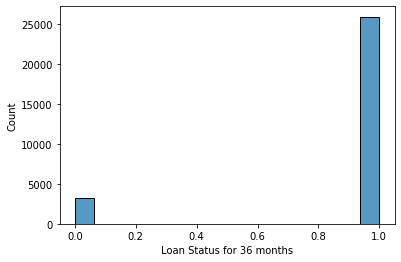

In [19]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status_flag)
plt.xlabel('Loan Status for 36 months')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    74.686215
0    25.313785
Name: loan_status_flag, dtype: float64


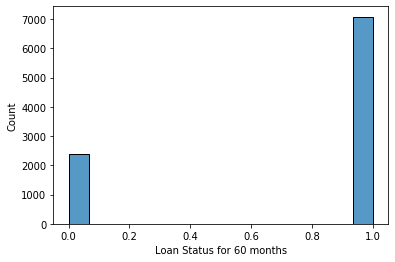

In [20]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status_flag)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

60 months Term of the loan shows higher Charged off percentage

In [21]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [22]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.261814
Name: home_ownership, dtype: float64

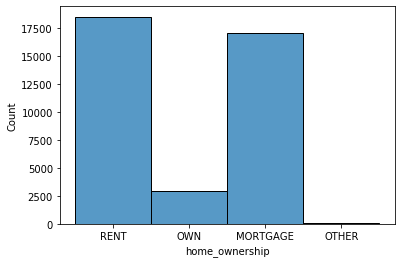

In [23]:
sns.histplot(loan_df.home_ownership)

### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [24]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
    print(df_nm[col_nm].value_counts())
    print("============================================")
    print(df_nm[col_nm].value_counts(normalize=True)*100)
    
    plt.figure(figsize = (30,5))
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

RENT        15641
MORTGAGE    14694
OWN          2532
OTHER          83
Name: home_ownership, dtype: int64
RENT        47.468892
MORTGAGE    44.594841
OWN          7.684370
OTHER        0.251897
Name: home_ownership, dtype: float64


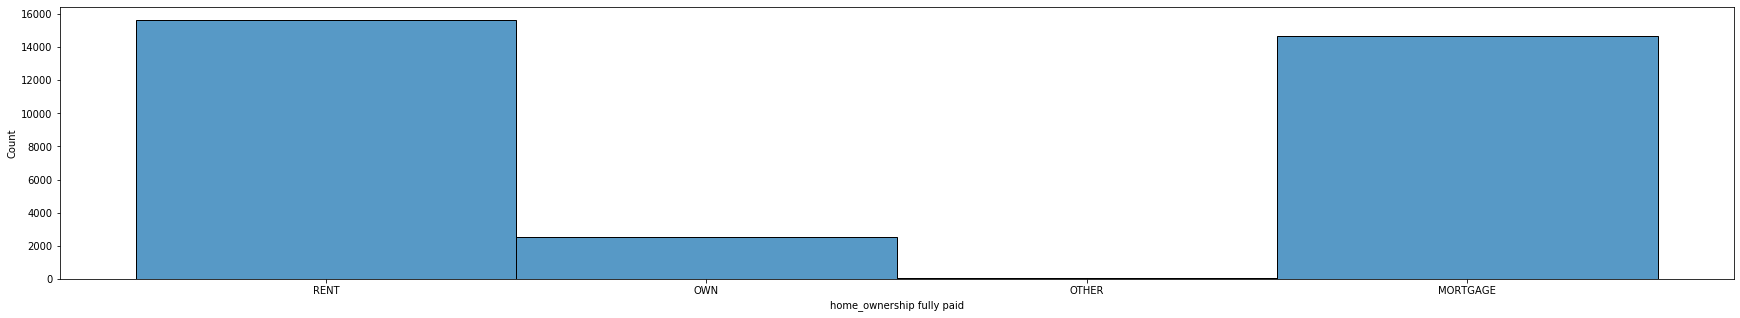

In [25]:
  # fully paid
    plot_hist(loan_df,'home_ownership',1)   

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64
RENT        50.453172
MORTGAGE    41.354185
OWN          7.872756
OTHER        0.319886
Name: home_ownership, dtype: float64


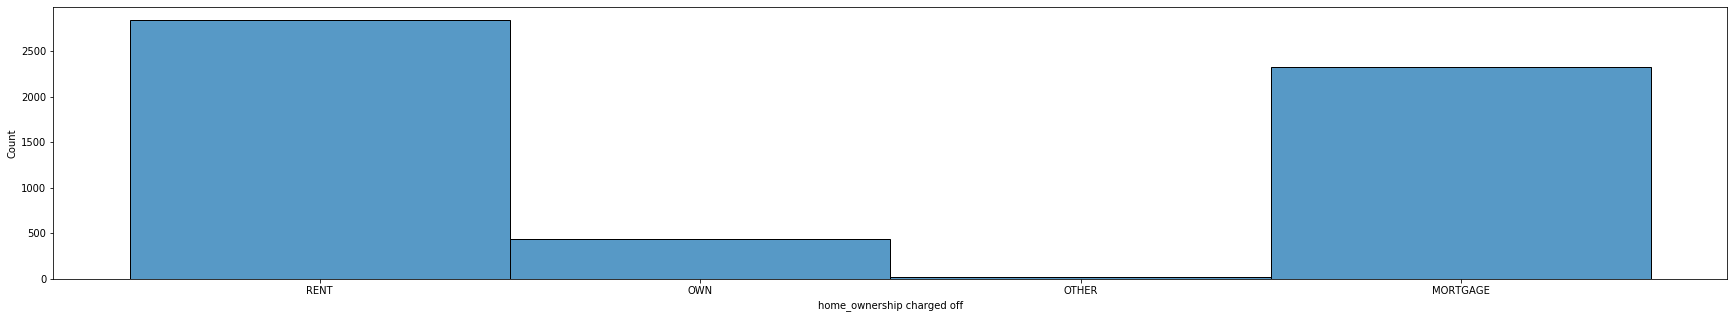

In [26]:
plot_hist(loan_df,'home_ownership',0) 
#Rental & Mortgage have higher probability of charge off than rest categories
#Percentage Distribution provided below

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64


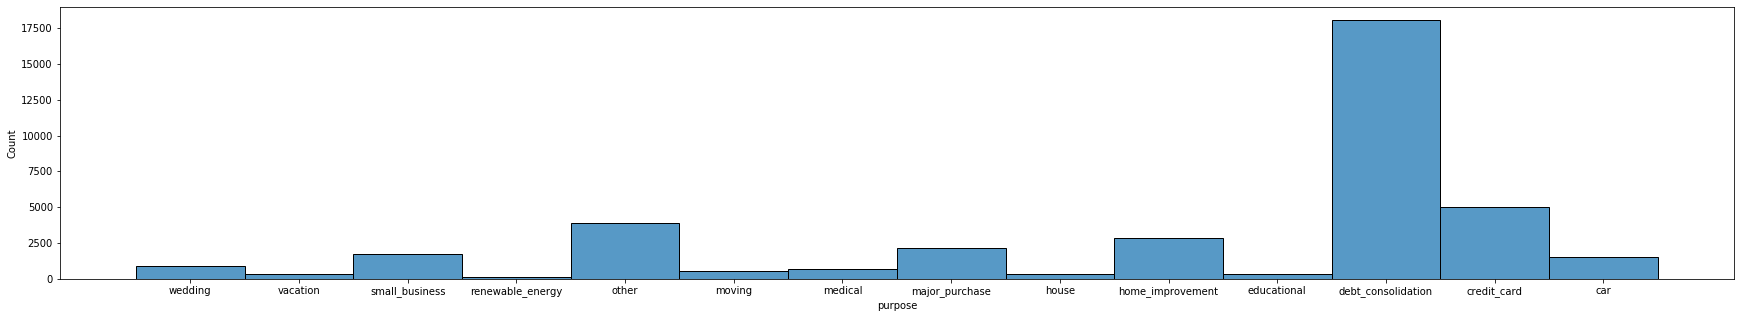

In [27]:
#loan_df.purpose.value_counts(normalize = True)*100
plot_hist(loan_df,'purpose',3)

debt_consolidation    15288
credit_card            4485
other                  3232
home_improvement       2528
major_purchase         1928
car                    1339
small_business         1279
wedding                 830
medical                 575
moving                  484
vacation                322
house                   308
educational             269
renewable_energy         83
Name: purpose, dtype: int64
debt_consolidation    46.397572
credit_card           13.611533
other                  9.808801
home_improvement       7.672231
major_purchase         5.851290
car                    4.063733
small_business         3.881639
wedding                2.518968
medical                1.745068
moving                 1.468892
vacation               0.977238
house                  0.934750
educational            0.816388
renewable_energy       0.251897
Name: purpose, dtype: float64


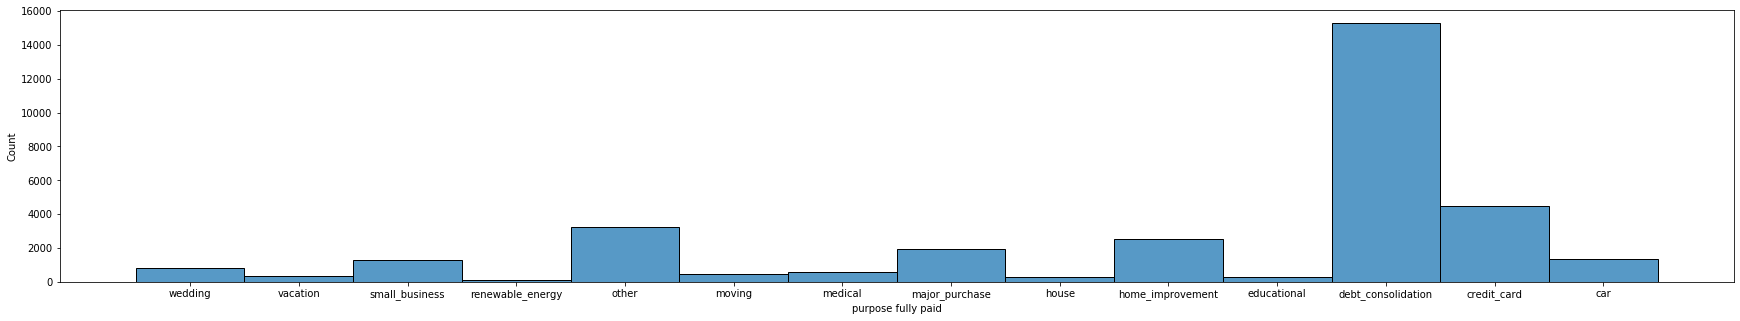

In [28]:
plot_hist(loan_df,'purpose',1) 

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64
debt_consolidation    49.173627
other                 11.249334
credit_card            9.632131
small_business         8.441443
home_improvement       6.166696
major_purchase         3.945264
car                    2.843433
medical                1.883775
wedding                1.706060
moving                 1.634974
house                  1.048516
educational            0.995202
vacation               0.941887
renewable_energy       0.337658
Name: purpose, dtype: float64


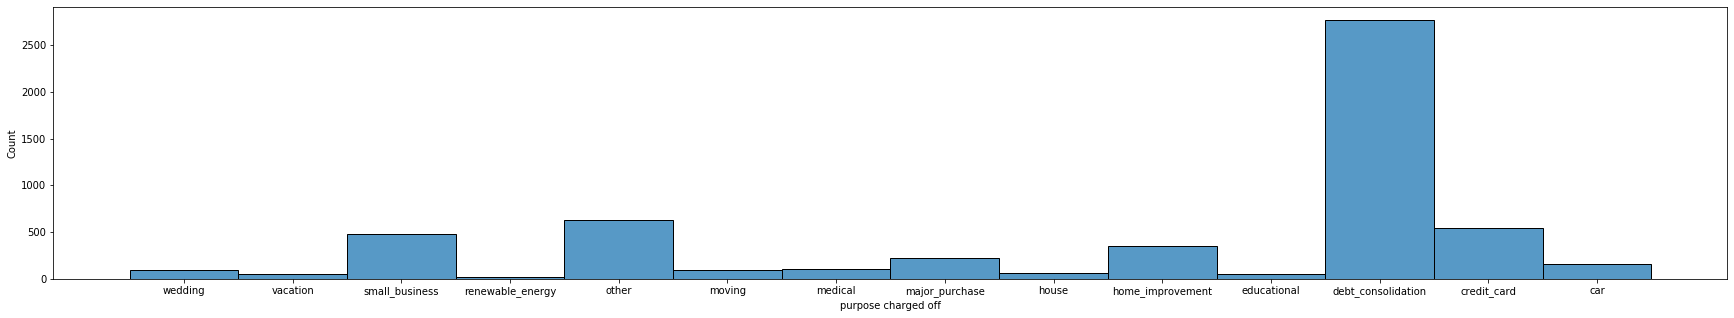

In [29]:
plot_hist(loan_df,'purpose',0) 
#From the below plot , it is observed that around 49% of the charge off has happened due to debt_consolidation

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64


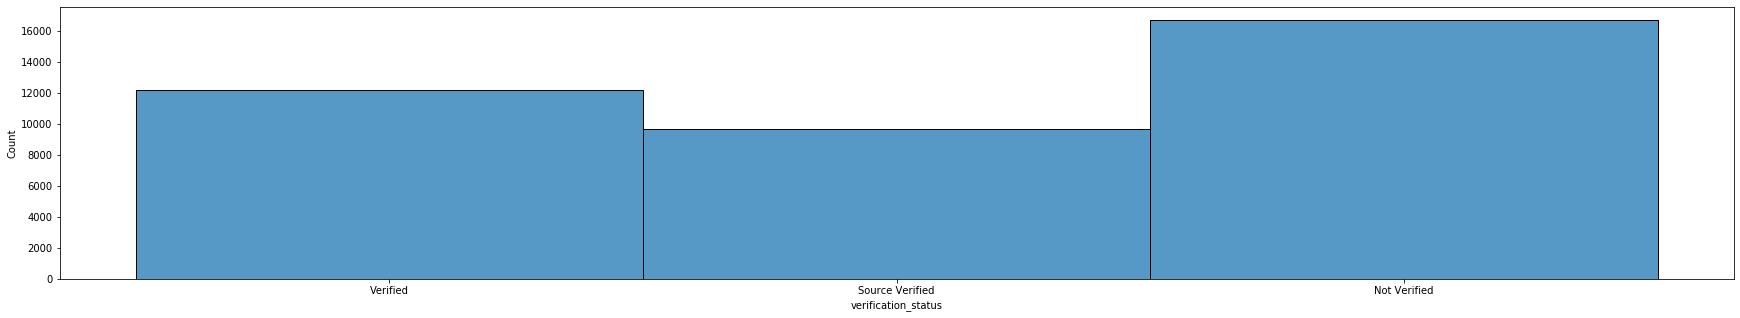

In [30]:
#sns.histplot(loan_df.verification_status)
plot_hist(loan_df,'verification_status',3)

Not Verified       14552
Verified           10155
Source Verified     8243
Name: verification_status, dtype: int64
Not Verified       44.163885
Verified           30.819423
Source Verified    25.016692
Name: verification_status, dtype: float64


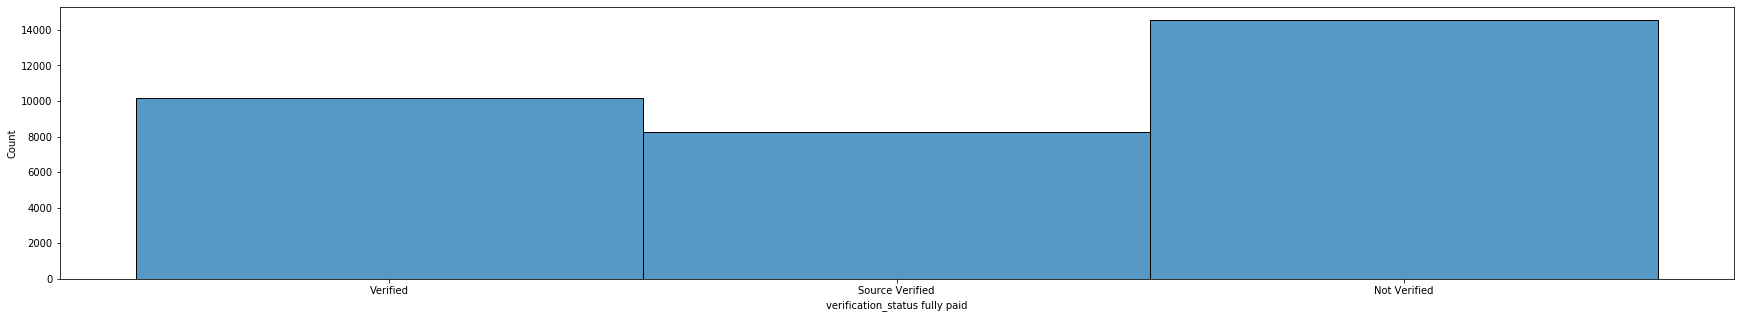

In [31]:
#sns.histplot(loan_df.verification_status)
plot_hist(loan_df,'verification_status',1)

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64
Not Verified       38.066465
Verified           36.449262
Source Verified    25.484272
Name: verification_status, dtype: float64


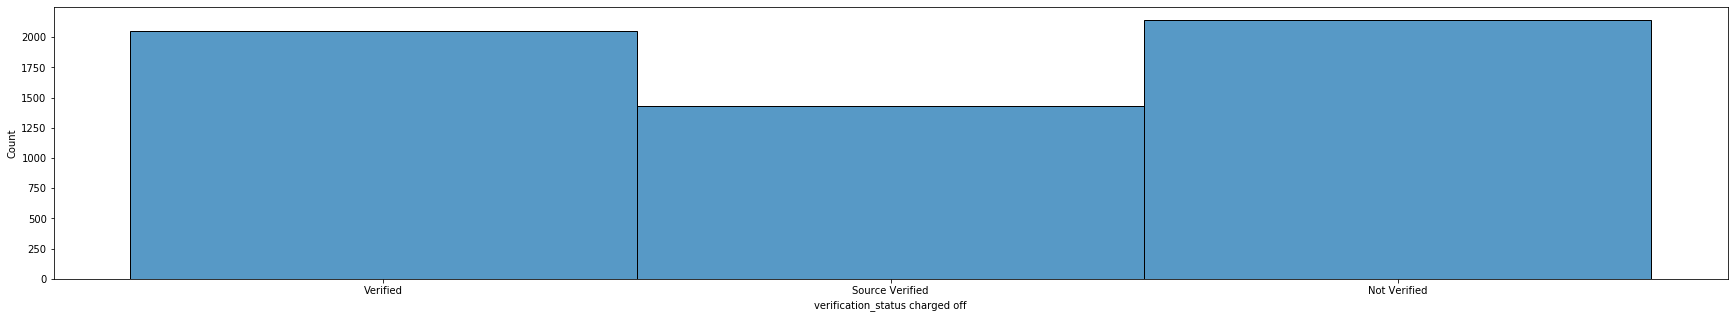

In [32]:
plot_hist(loan_df,'verification_status',0)
#Can't be drawn any conclusion for now

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64


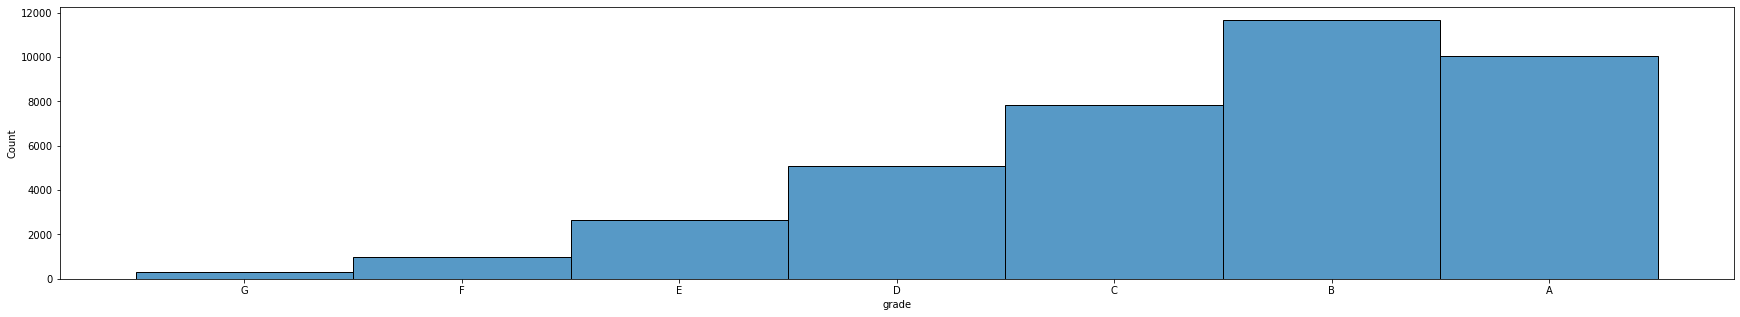

In [33]:
# subgrade
plot_hist(loan_df,'grade',3)

B    10250
A     9443
C     6487
D     3967
E     1948
F      657
G      198
Name: grade, dtype: int64
B    31.107739
A    28.658574
C    19.687405
D    12.039454
E     5.911988
F     1.993930
G     0.600910
Name: grade, dtype: float64


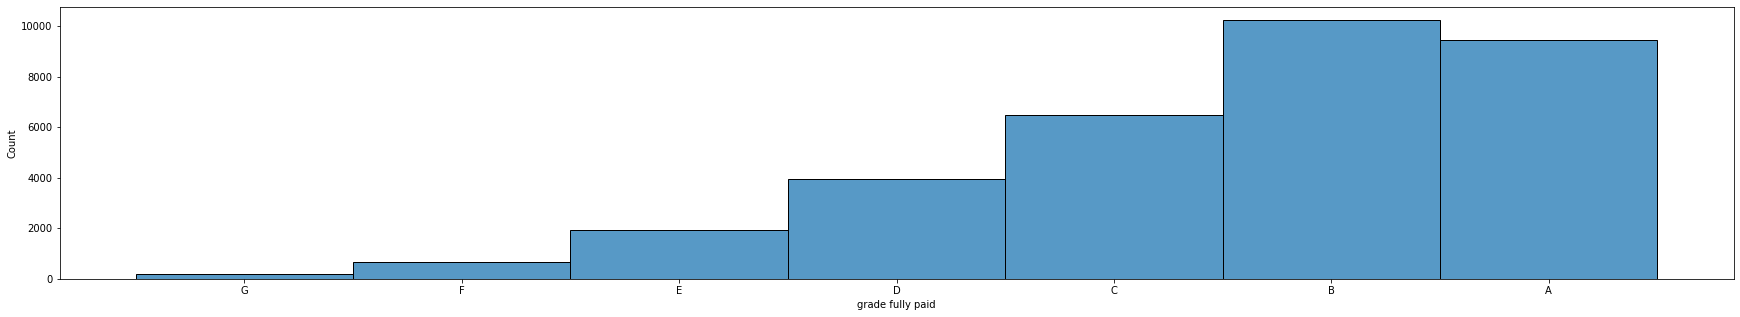

In [34]:
plot_hist(loan_df,'grade',1)

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64
B    25.324329
C    23.938155
D    19.868491
E    12.706593
A    10.698418
F     5.669095
G     1.794917
Name: grade, dtype: float64


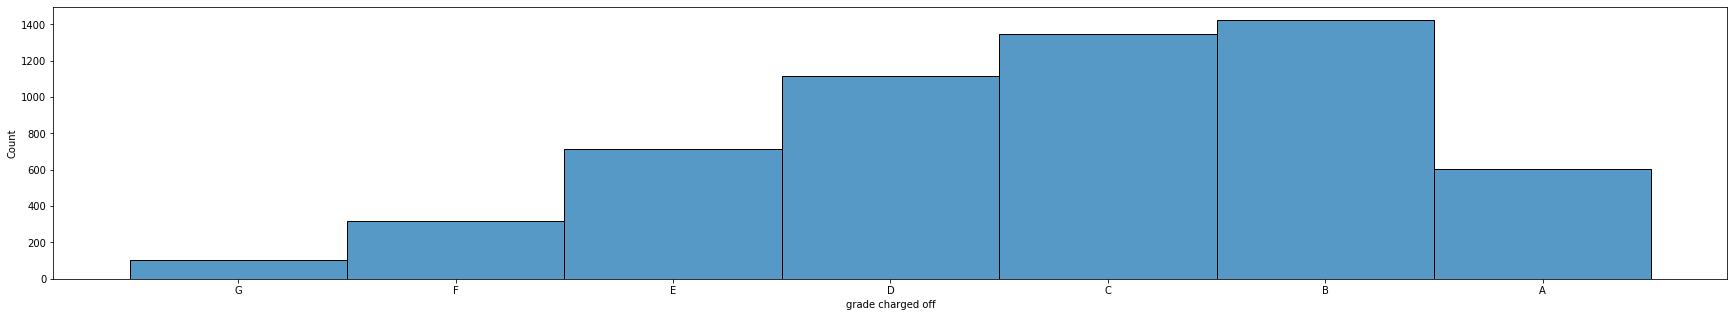

In [35]:
plot_hist(loan_df,'grade',0)

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population

In [36]:
#Employement Length
loan_df.emp_length.unique()

array(['1 year', '10+ years', '3 years', '4 years', '< 1 year', '6 years',
       '2 years', '9 years', '8 years', '5 years', '7 years', nan],
      dtype=object)

In [37]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
#loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: (x.split(' ')[0]))
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

['1 year' '10 years' '3 years' '4 years' '0 years' '6 years' '2 years'
 '9 years' '8 years' '5 years' '7 years' nan]
[ 1. 10.  3.  4.  0.  6.  2.  9.  8.  5.  7. nan]


count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


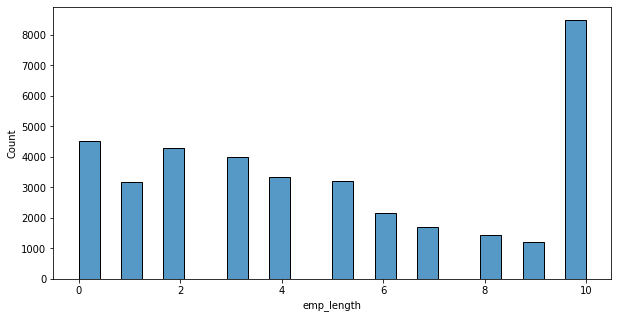

In [38]:
print(loan_df['emp_length'].describe())
plt.figure(figsize = (10,5))
sns.histplot(loan_df.emp_length)

10.0    1331
0.0      639
2.0      567
3.0      555
4.0      462
5.0      458
1.0      456
6.0      307
7.0      263
8.0      203
9.0      158
Name: emp_length, dtype: int64
10.0    24.652713
0.0     11.835525
2.0     10.501945
3.0     10.279681
4.0      8.557140
5.0      8.483052
1.0      8.446009
6.0      5.686238
7.0      4.871272
8.0      3.759956
9.0      2.926468
Name: emp_length, dtype: float64


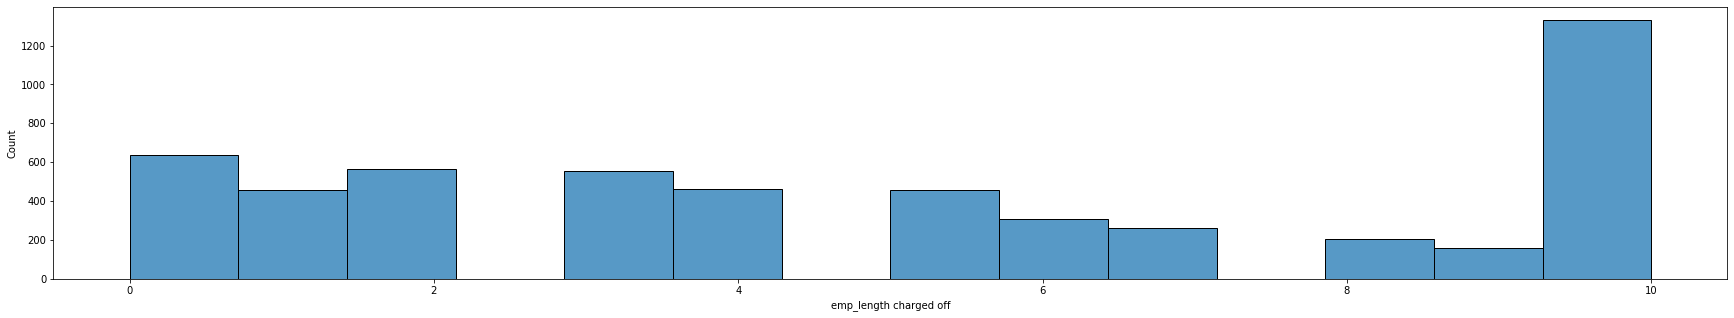

In [39]:
plot_hist(loan_df,'emp_length',0)

10.0    7157
0.0     3869
2.0     3724
3.0     3457
4.0     2880
5.0     2736
1.0     2713
6.0     1861
7.0     1448
8.0     1232
9.0     1068
Name: emp_length, dtype: int64
10.0    22.264738
0.0     12.036086
2.0     11.585005
3.0     10.754394
4.0      8.959403
5.0      8.511433
1.0      8.439882
6.0      5.789392
7.0      4.504589
8.0      3.832633
9.0      3.322445
Name: emp_length, dtype: float64


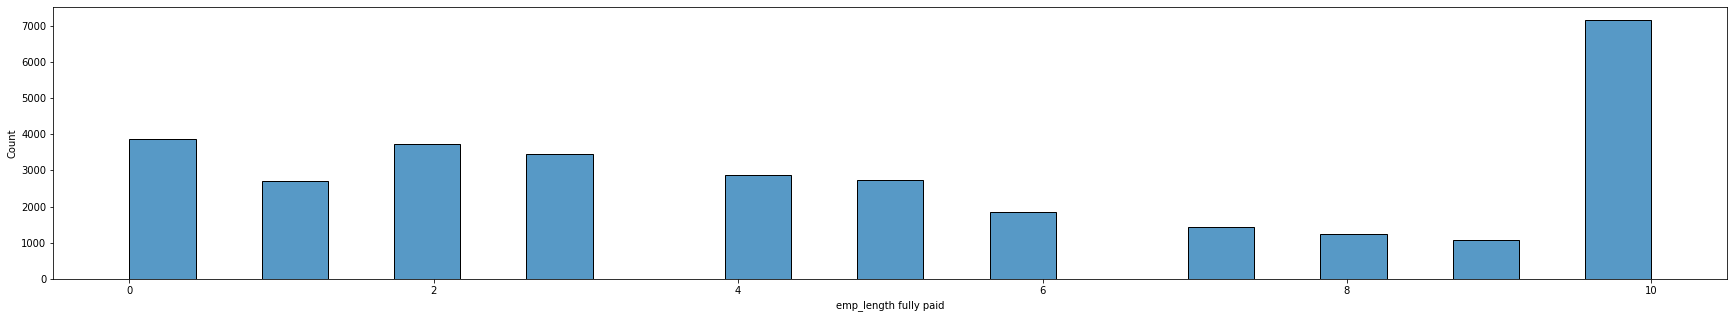

In [40]:
plot_hist(loan_df,'emp_length',1)

Observation: Employment length is not providing any insights here, as borrowers with 10+ years of employment are more in both the population 'Fully Paid' and 'Charged-off'

60000.0    3.800192
50000.0    2.667392
40000.0    2.216347
45000.0    2.102289
30000.0    2.094512
             ...   
78708.0    0.002592
47544.0    0.002592
35292.0    0.002592
77976.0    0.002592
8472.0     0.002592
Name: annual_inc, Length: 5215, dtype: float64


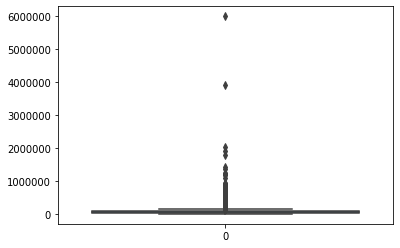

In [41]:
print(loan_df.annual_inc.value_counts(normalize = True)*100)
sns.boxplot(loan_df['annual_inc'])

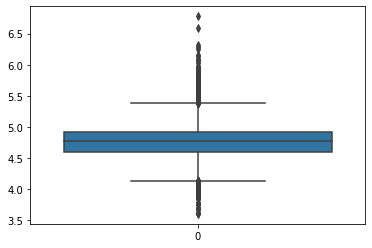

In [42]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income inorder to fit it into box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))
sns.boxplot(loan_df['log_annual_inc'])


In [52]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,4.723308,0.243184,3.61066,4.568202,4.724276,4.875061,6.096910
Fully Paid,32950.0,4.770893,0.242443,3.60206,4.614188,4.778151,4.924279,6.778151


{'whiskers': [<matplotlib.lines.Line2D at 0x1af0e9a9148>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0e9a9e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e9a9488>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e9a12c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0abd4e08>],
 'means': []}

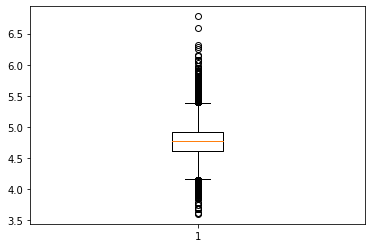

In [53]:
# Fully Paid
loan_df_fp = loan_df[loan_df['loan_status_flag'] == 1]
plt.boxplot(loan_df_fp['log_annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1af0c7ad948>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0c7ada88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e909048>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e9ae248>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0e9ae188>],
 'means': []}

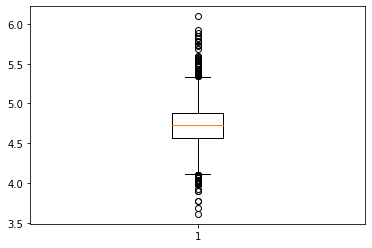

In [54]:
# Charged Off
loan_df_ci = loan_df[loan_df['loan_status_flag'] == 0]
plt.boxplot(loan_df_ci['log_annual_inc'])

Observation: Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

In [55]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [56]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

AttributeError: 'float' object has no attribute 'strip'

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


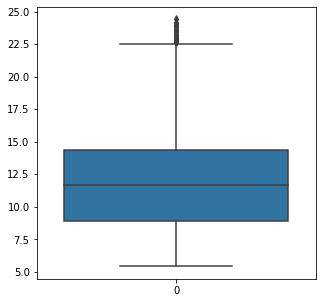

In [57]:
print(loan_df.int_rate.describe())
plt.figure(figsize=(5,5))
sns.boxplot(loan_df['int_rate'] )

In [58]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


{'whiskers': [<matplotlib.lines.Line2D at 0x1af0e3c8b08>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0e3c8c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e3c83c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e3cdfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0e3cdcc8>],
 'means': []}

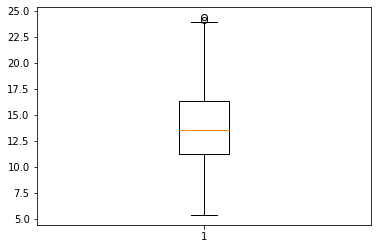

In [60]:
plt.boxplot(loan_df_ci['int_rate'] )

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


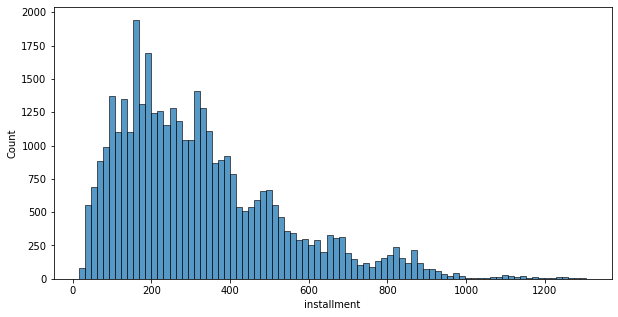

In [61]:
# installment
print(loan_df.installment.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['installment'] )

In [62]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


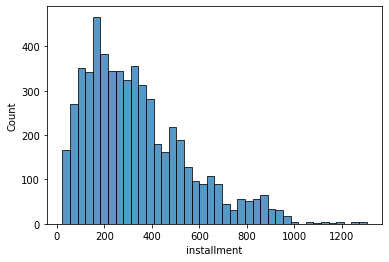

In [63]:
#sns.boxplot(loan_df_ci['installment'] )
sns.histplot(loan_df_ci['installment'] )

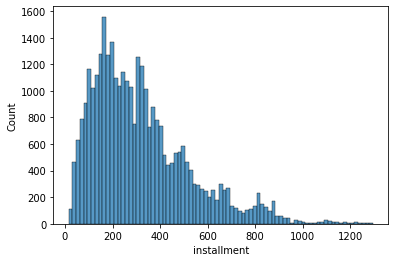

In [64]:
#sns.boxplot(loan_df_fp['installment'] )
sns.histplot(loan_df_fp['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


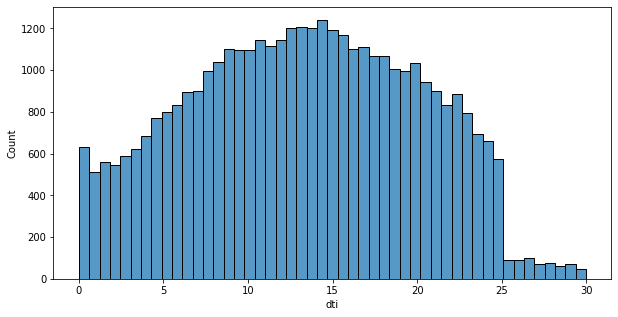

In [65]:
# dti
print(loan_df.dti.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['dti'] )

In [66]:
loan_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85
Fully Paid,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99


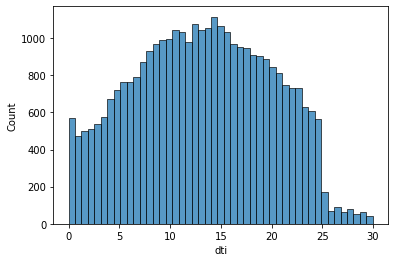

In [67]:
sns.histplot(loan_df_fp['dti'] )

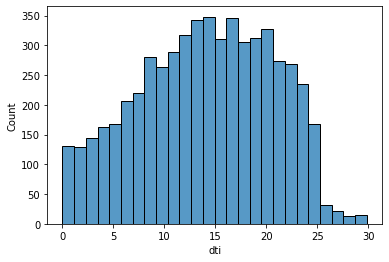

In [68]:
sns.histplot(loan_df_ci['dti'] )

Observation: Charged Off loans have marginally higher dti when compared to Fully Paid loans. 

In [69]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(pickDate)
loan_df.earliest_cr_line

32979    1991
8515     1990
38972    2000
10829    1989
15527    1994
         ... 
10586    1989
25143    1976
22270    2003
12320    1986
26034    2000
Name: earliest_cr_line, Length: 38577, dtype: int64

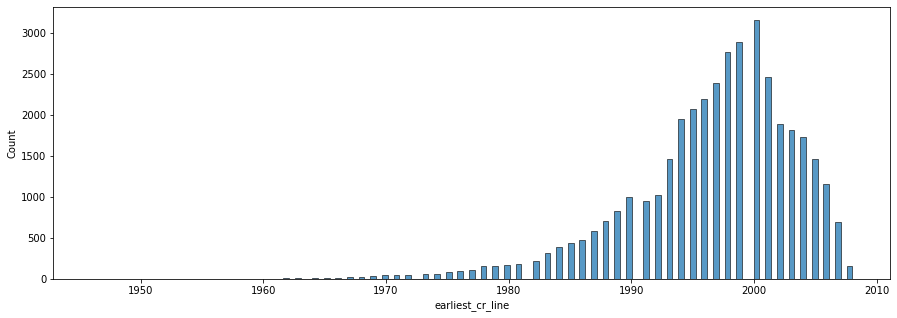

In [70]:
plt.figure(figsize=(15,5))
sns.histplot(loan_df['earliest_cr_line'] )

In [71]:
loan_df.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,1996.947396,6.757051,1962.0,1994.0,1998.0,2001.0,2008.0
Fully Paid,32950.0,1996.546313,6.824043,1946.0,1993.0,1998.0,2001.0,2008.0


2000    500
1999    442
1998    415
1997    374
2001    356
1995    303
1996    299
1994    275
2002    255
2005    239
2004    229
2003    225
2006    224
1993    195
2007    144
1991    143
1992    135
1990    125
1989    112
1988    106
1987     77
1985     66
1983     53
1986     53
1984     49
1982     32
1979     31
2008     28
1978     23
1981     20
1980     16
1977     13
1973     12
1975      9
1972      8
1970      7
1974      6
1968      5
1967      5
1971      5
1976      4
1969      3
1966      2
1962      2
1965      1
1963      1
Name: earliest_cr_line, dtype: int64
2000    8.885730
1999    7.854985
1998    7.375156
1997    6.646526
2001    6.326639
1995    5.384752
1996    5.313666
1994    4.887151
2002    4.531722
2005    4.247379
2004    4.069664
2003    3.998578
2006    3.980807
1993    3.465435
2007    2.559090
1991    2.541319
1992    2.399147
1990    2.221432
1989    1.990403
1988    1.883775
1987    1.368402
1985    1.172916
1983    0.941887
1986    0.941887
198

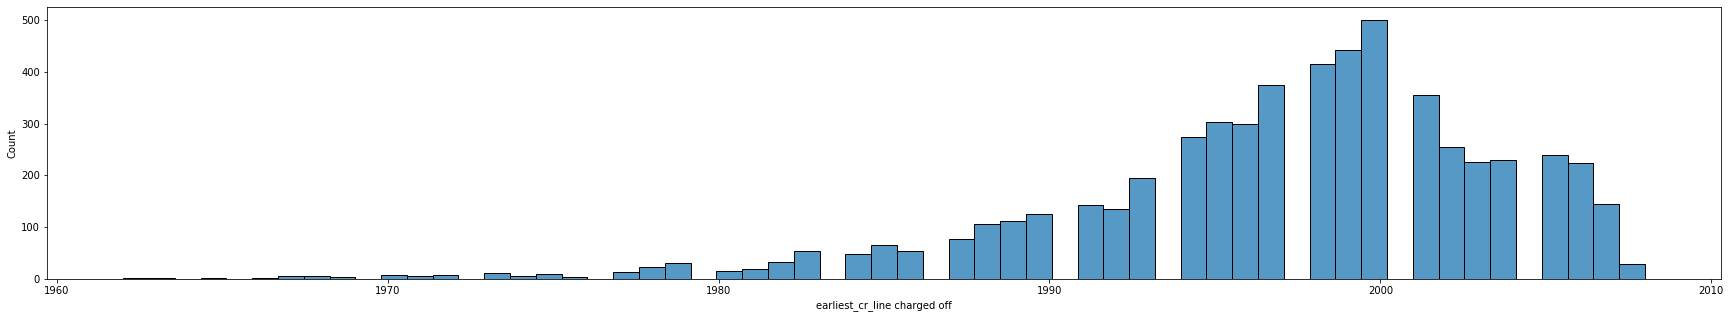

In [80]:
plot_hist(loan_df,'earliest_cr_line',0)
#sns.histplot(loan_df_ci['earliest_cr_line'] )

2000    2660
1999    2454
1998    2358
2001    2106
1997    2013
1996    1903
1995    1775
1994    1673
2002    1635
2003    1588
2004    1498
1993    1265
2005    1228
2006     930
1992     894
1990     880
1991     802
1989     722
1988     603
2007     554
1987     513
1986     425
1985     373
1984     346
1983     269
1982     183
1981     161
1980     159
1978     138
1979     126
2008     125
1977      99
1976      89
1975      74
1974      56
1973      49
1972      41
1970      40
1971      40
1969      34
1968      14
1967      13
1963       9
1966       9
1965       7
1964       6
1962       3
1961       2
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line, dtype: int64
2000    8.072838
1999    7.447648
1998    7.156297
2001    6.391502
1997    6.109256
1996    5.775417
1995    5.386950
1994    5.077390
2002    4.962064
2003    4.819423
2004    4.546282
1993    3.839150
2005    3.726859
2006    2.822458
1992    2.713202
1990    2.670713
19

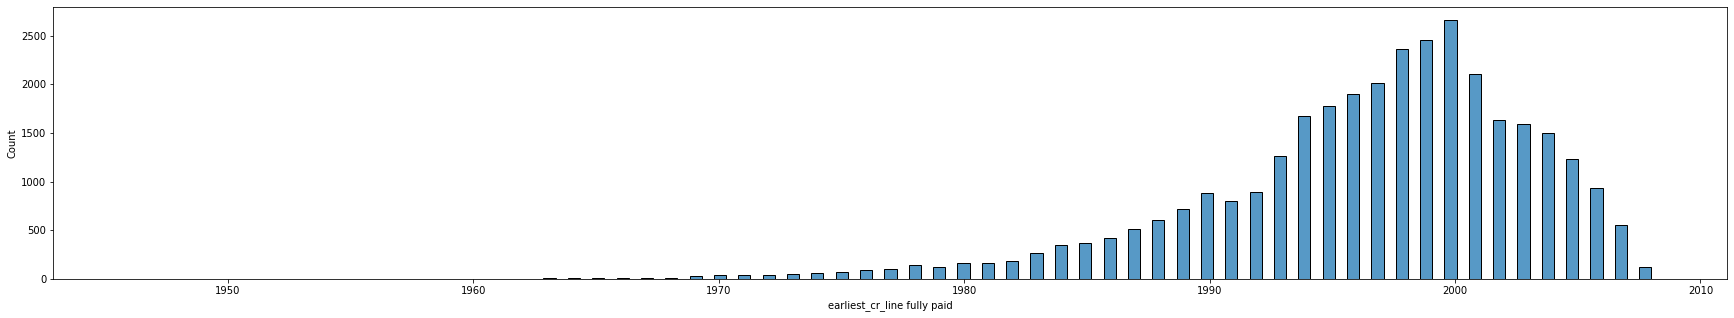

In [81]:
plot_hist(loan_df,'earliest_cr_line',1)
#plt.boxplot(loan_df_fp['earliest_cr_line'] )

In [ ]:
#revol_util
print(loan_df.revol_util.describe())
loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(str(x).strip('%')))

loan_df.revol_util_log = loan_df.revol_util.apply(lambda x: np.log10(x))
print(loan_df.revol_util_log.describe())

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loan_df['revol_util'] )

Bivariate Analysis

In [ ]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

In [ ]:
sns.boxplot(loan_df['loan_status'])
loan_df['loan_amnt'].quantile([0.25, 0.5, 0.75, 0.85, 0.99])